In [2]:
import matplotlib.pyplot as plt
from joblib import load, dump
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import warnings, os
from glob import glob
from sklearn.utils import shuffle

import seaborn as sns
import scipy.stats as stats
import tensorflow as tf

import aggmap
from aggmap import loadmap, aggmodel
%config Completer.use_jedi = False

/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/s

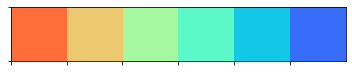

In [3]:
c1 = sns.color_palette("rainbow_r", 6).as_hex()
c2 = sns.color_palette("rainbow_r", 8).as_hex()
sns.palplot(c1)


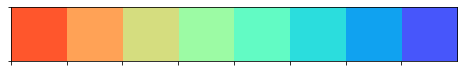

In [4]:
sns.palplot(c2)

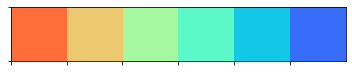

In [5]:

color = c1#['#eb34bd', '#b9bab5', '#30f050','#26ad2b']
sns.palplot(color)

In [6]:
cols = ['OrgRP1','Org1','RPAgg1','RPAgg5']

df1 = pd.read_csv('./test_robustness_acc.csv',index_col=0)
df1 = df1[cols]
df1.index = df1.index.map(lambda x: '%.2f' % x)

In [7]:
results_save_folder = './'

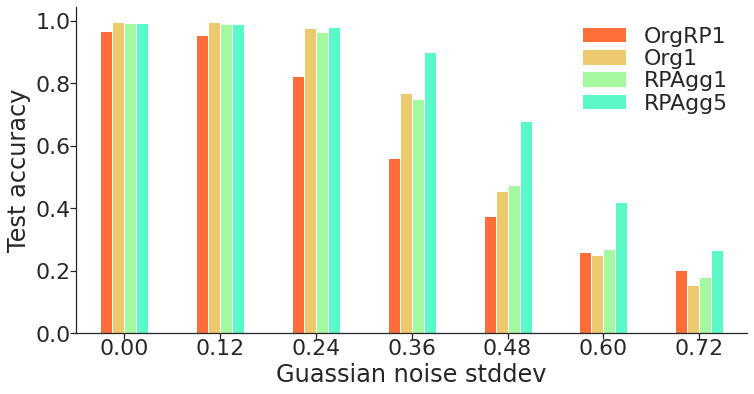

In [8]:



sns.set(style= 'white',font_scale = 2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,6), sharex=True, sharey=False, )
      
#
#ax1 = df1.plot(kind = 'line',  color = color, ax = ax)
s1 = df1.plot(kind = 'bar',  color = color, ax = ax, alpha = 1, width=0.5)



ax.set_ylabel('Test accuracy')
ax.set_xticklabels(labels = df1.index,rotation=0, ha = 'center')

sns.despine(top=True, right=True, left=False, bottom=False)
ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6, )
ax.legend(frameon=False, ncol = 1, labelspacing=0.1)

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2)
plt.savefig(os.path.join(results_save_folder, 'performance_Guassian_Noise_test.pdf'), bbox_inches='tight', dpi=400)

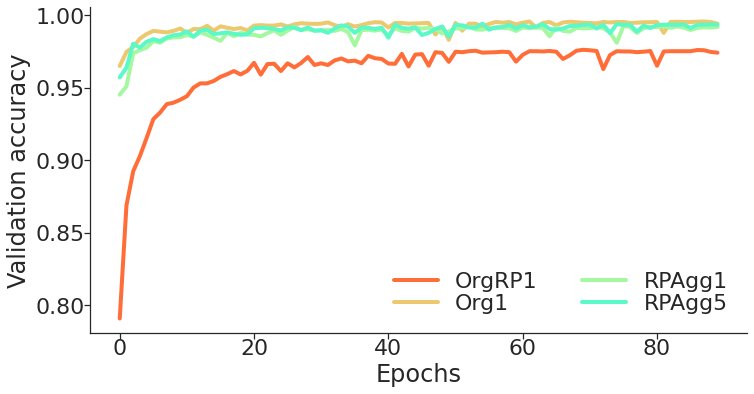

In [23]:

df2 = pd.read_csv('./tr_history_valid_acc.csv',index_col=0)
df2 = df2[cols]

df2.columns = ['OrgRP1', 'Org1', 'RPAgg5', 'RPAgg1']
df2 = df2[['OrgRP1', 'Org1', 'RPAgg1', 'RPAgg5']] #.rolling(2).mean().shift(2)
df2 = df2.head(90)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,6), sharex=True, sharey=False, )
      
#
#ax1 = df1.plot(kind = 'line',  color = color, ax = ax)
s1 = df2.plot(kind = 'line',  color = color, ax = ax, alpha = 1, lw=4)



ax.set_ylabel('Validation accuracy')
ax.set_xlabel('Epochs')
#ax.set_xticklabels(labels = df2.index,rotation=0, ha = 'center')

sns.despine(top=True, right=True, left=False, bottom=False)
ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6, )
ax.legend(frameon=False, ncol = 2, labelspacing=0.1)
#ax.set_xlim(0, 90)

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2)
plt.savefig(os.path.join(results_save_folder, 'his_performance_Guassian_Noise_test.pdf'), bbox_inches='tight', dpi=400)

In [ ]:
ax